## Willkommen im Hands-on zu Dataloadern und Neuronalen Netzen

Dieses Mal haben wir viel vor. Der erste Schritt wird sein, den SVHN-Datensatz aus StudIP herunterzuladen und zu entpacken. Die Labels sind in der Datei labels.csv enthalten. Hier ist jeweils die erste Spalte der Index der Bilddatei und die zweite Spalte das Label.

z.B: label=5 bei index=5, das ist die Bilddatei 5.jpg.




## Schritt 2: Dataset

Erzeuge eine von der Klasse Dataset abgeleitetes Klasse (aus torch.utils.data.Dataset) für diese Daten. 

Dieses soll die folgenden Funktionen implementieren:
- __init__(self): Einlesen der Labels / Vorbereiten der Datenstrukturen
- __len__(self): Gibt die Länge des Datensatzes zurück
- __getitem__(self,idx): Gibt das Datensatz-Item an Position idx zurück.

Achte darauf, dass die getitem-Funktion kein Image zurückliefern soll sondern einen torch.Tensor. Dafür kann es hilfreich sein die transforms aus torch.vision zu nutzen.
  



In [77]:
from torch.utils.data import Dataset


class SVHNDataset(Dataset):

    ...

ds = SVHNDataset()

Der folgende Block mit assert-Funktionen soll helfen, zu prüfen ob Du alles richtig gemacht hast.

In [87]:
import torch

assert isinstance(ds, torch.utils.data.Dataset), "DS ist nicht vom richtigen Typ"
assert hasattr(ds,'__len__'), "__len__() Funktion ist nicht definiert."
assert hasattr(ds,'__getitem__'), "__getitem__() Funktion ist nicht definiert."
assert hasattr(ds,'__init__'), "__init__() Funktion ist nicht definiert."
assert len(ds)==73257, "Datensatz hat nicht die richtige Länge"
assert len(ds[0])==2, "Datensatz.__getitem__() gibt keine 2 Werte zurück"
assert isinstance(ds[0][0],torch.Tensor), "Datensatz.__getitem__() gibt keinen Tensor als ersten Rückgabewert"
assert len(ds[0][0].shape)==3, "Datensatz.__getitem__() gibt für Eingabedaten falsche Dimensionen zurück (erwartet: 3x32x32)"
assert ds[0][0].shape[0]==3, "Datensatz.__getitem__() gibt für Eingabedaten falsche Dimensionen zurück (erwartet: 3x32x32)"
assert ds[0][0].shape[1]==32, "Datensatz.__getitem__() gibt für Eingabedaten falsche Dimensionen zurück (erwartet: 3x32x32)"
assert ds[0][0].shape[2]==32, "Datensatz.__getitem__() gibt für Eingabedaten falsche Dimensionen zurück (erwartet: 3x32x32)"



## Schritt 3: Dataloader
Nimm das Dataset und erzeuge einen Dataloader mit batch_size 32 und zufälliger Reihenfolge der Samples dafür:

In [43]:
from torch.utils.data import DataLoader

data_loader = ...


In [55]:
sample = next(iter(data_loader))[0]

assert sample.shape[0]==32, 'Batch size soll 32 sein'
assert sample.shape[1]==3, 'Tensor soll Dimension Bx3x32x32 haben'
assert sample.shape[2]==32, 'Tensor soll Dimension Bx3x32x32 haben'
assert sample.shape[3]==32, 'Tensor soll Dimension Bx3x32x32 haben'


torch.Size([32, 3, 32, 32])


## Schritt 4: Wir bauen ein neuronales Netz

Ein neuronales Netz in pyTorch ist eine Klasse die vom Objekt nn.Module abgeleitet ist, ähnlich wie in diesem Beispiel aus der Vorlesung:

```
class TwoLayerPerceptron(nn.Module):
    def __init__(self):
        super(TwoLayerPerceptron, self).__init__()
        
        self.fc1 = nn.Linear(784, 32) 
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(32, 10) 
        self.sigmoid2 = nn.Sigmoid()


    def forward(self, x):
        # Linear function  # LINEAR
        out = self.sigmoid2(self.fc2(self.sigmoid1(self.fc1(x))))
        return out
```


Aufgabe: Baue ein neuronales Netz mit dem Klassennamen `MLP` mit 5 Schichten (inklusive Input und Output) und folgender Anzahl an hidden Neurons: 
- 1. Hidden Layer: 256
- 2. Hidden Layer: 128
- 3. Hidden Layer: 64

Verwende als Aktivierungsfunktion die Sigmoid-Funktion.


In [90]:
# Dein Code hier :-)



Nun wird das Modell instanziiert:

In [116]:
model = MLP()


assert isinstance(model, nn.Module), "Falscher Objekttyp für MLP. Muss nn.Module sein."
assert len(list(model.modules()))==6, "Falsche Anzahl an Layern. Insgesamt 5 Layer notwendig."

assert list(model.modules())[1].in_features==3072, "Eingangsgröße (muss sein: 32x32x3 = 3072) stimmt nicht."
assert list(model.modules())[1].out_features==256, "Hidden Neurons im ersten Layer ist nicht 256"
assert list(model.modules())[2].out_features==128, "Hidden Neurons im zweiten Layer ist nicht 128"
assert list(model.modules())[3].out_features==64, "Hidden Neurons im dritten Layer ist nicht 64"


## Trainieren des Modells

Als letzten Schritt trainieren wir das eben erzeugte Modell. Das müssen wir erstmal vorbereiten:

1. Dafür müssen wir zunächst einen Optimizer definieren. Wir wählen hier Adam (optim.Adam) als Optimizer (den werden wir später noch behandeln) und eine Learning Rate von 10^-3 (1e-3).
2. Außerdem brauchen wir eine Loss-Funktion. Für multinomiale Klassifikation eignet sich CrossEntropy gut. 





In [118]:
from torch import optim

optimizer = ...
loss_function = ...


### Trainings-Loop

Jetzt bauen wir den Trainings-Loop. Dieser soll folgendes erledigen:

- Wir wollen 10 Epochen trainieren. Dafür benötigen wir einen entsprechenden for-loop.
- Wir ziehen die Bilder und Labels aus dem Dataloader:
- Wir setzen den Gradienten-Speicher mit zero_grad() im Optimizer auf 0.
- Wir machen einen Inference-Pass (Forward pass)
- Wir bestimmen die Loss-Funktion
- Wir machen die Backpropagation um die Gradienten des Loss zu bestimmen
- Wir aktualisieren die Gewichte (step() im optimizer)

Es ist außerdem hilfreich den Loss zu beobachten um zu sehen, ob dieser auch wirklich (wie gewünscht) sinkt. 



In [119]:

for epoch in range(10):
    model.train()  # Set the model to training mode
    
    ...


Epoch [1/10], Loss: 1.9610726094662363
Epoch [2/10], Loss: 1.8607346013643855
Epoch [3/10], Loss: 1.8028038413243523
Epoch [4/10], Loss: 1.7156463570990417
Epoch [5/10], Loss: 1.5950921158603184
Epoch [6/10], Loss: 1.4946946016305398
Epoch [7/10], Loss: 1.3820684318979755
Epoch [8/10], Loss: 1.3113990332882477
Epoch [9/10], Loss: 1.2534589905665952
Epoch [10/10], Loss: 1.2059980702452264


Unten habe ich einmal Ergebnisse meines Trainings-Runs dargestellt. Wie wir sehen, ist da noch viel Luft nach oben:

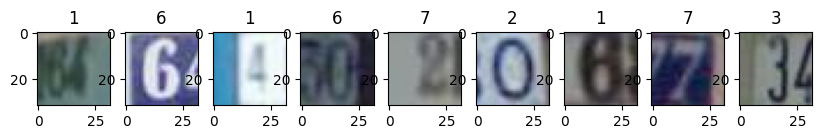

In [155]:
from PIL import Image
import matplotlib.pyplot as plt
preds = model(images).argmax(1)
fig, ax = plt.subplots(1,len(images), figsize=(10,4))
for i,(image,pred) in enumerate(zip(images,preds)):
    ax[i].imshow(image.permute(1, 2, 0).cpu().numpy())
    ax[i].set_title(str(int(pred)))
